# DSCI 100 Group Project -- Heart Disease Data Analysis

team: Rachel Liang, Ziyan He, Yuchen Zhang, Zohane Bal

In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(tidymodels)
library(GGally)
library(ggplot2)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

## Introduction    

The dataset we are working on is downloaded from the UCI Machine Learning Repository. Although the dataset contains four databases about the heart disease diagnosis from 4 different locations, we only picked the database collected from the Cleveland Clinic Foundation since it is the only data base that has full 14 attributes recored for each heart disease diagnosis. The total instances in this database is 303.

## Method and Result

### Load Data and Wrangle Data
This dataset does not need to be cleaned since it does not have any missing data or missing attributes. <br>
We added column names to the dataset and selected columns we need for analysis. Also as we are treating some attributes numeric values as categorical variables, we used as.factor() for conversion.

In [2]:
heart_disease_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"


heart_disease_data <- read_csv(heart_disease_url, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs",
                                                               "restecg", "thalach", "exang", "oldpeak", "slope",
                                                               "ca", "thal", "num"))
heart_disease_data

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


### 14 Attributes Description
* Age: age in years
* Sex: ( 1 = male, 0 = female)
* Cp: chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4 asymptomatic
* Trestbps: Resting Blood pressure ( in mm Hg on admission to hospital)
* Chol: Serum cholesterol in mg/dl
* Fbs: Fastig blood suger > 120 (1 = true, 0 = false)
* Dm: 1 = history if diabetes , 0 = no such history)
* Restecg: Resting electro cardiac results
Value 0 : normal
Value 1: having ST-T wave abnormality ( T wave inversion and/or ST elevation or depression of > 0.05 mV)
Value 2” Showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Thalach: maximum heart rate achieved
* Exang: exercise induced angina (1 = yes ,0 = no)
* Oldpeak:ST depression induced by exercise relative to rest
* Slope: The slope of the peak exercise ST segment
Value 1: upsloping
Value 2: flat
Value 3: downsloping
* Ca: Number of major vessels (0-3) coloured by fluorosopy
* Thal: 3 = normal , 6= fixed defect , 7 = reversible defect
* Num: diagnosis of heart disease
Value 0 <50% diameter narrowing
Value 1 > 50% Diameter narrowing

### Summary of the dataset

In [3]:
summary(heart_disease_data)

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :1.000   Min.   : 94.0  
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:3.000   1st Qu.:120.0  
 Median :56.00   Median :1.0000   Median :3.000   Median :130.0  
 Mean   :54.44   Mean   :0.6799   Mean   :3.158   Mean   :131.7  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:4.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :4.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :241.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.7   Mean   :0.1485   Mean   :0.9901   Mean   :149.6  
 3rd Qu.:275.0   3rd Qu.:0.0000   3rd Qu.:2.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope            ca           
 

### Observation from the Correlation Plot
Through the correlation plot (figure 1), we found five predictors with relatively large absolute correlation value, which are cp, thalach, exang, oldpeak, and slope.<br> 
The high correlation with the target variable results we found here in these five predictors is reasonable since some academic resources also show this relationship.
1. Thalach: Thalach is the maximum heart rate achieved. Perret-Guillaume et al. (2009) examines the relationship between heart rate and the occurrence of heart disease and found out that patients with higher heart rates show a higher risk of heart disease and other comorbidities as well.

2. Oldpeak: Oldpeak is the ST depression induced by exercise relative to rest. Diderholm et al. (2002) evaluated the relationship between ST depression and poor prognosis in heart disease and whether measurement of ST deppression can lead to better medical outcomes. They found that higher values of ST depression always lead to an increased risk of heart disease.

3. Slope: Slope is the slope of the peak exercise ST segment value. Robert et al. (1986) found the ST segment shift relative to exercise-induced increments in heart rate is a more accurate measure of risk of heart disease.

The above three academic resources sugguset that thalach, oldpeak and slope should have a high correslation with heart disease. Therefore, it reasons our choice of predictors.


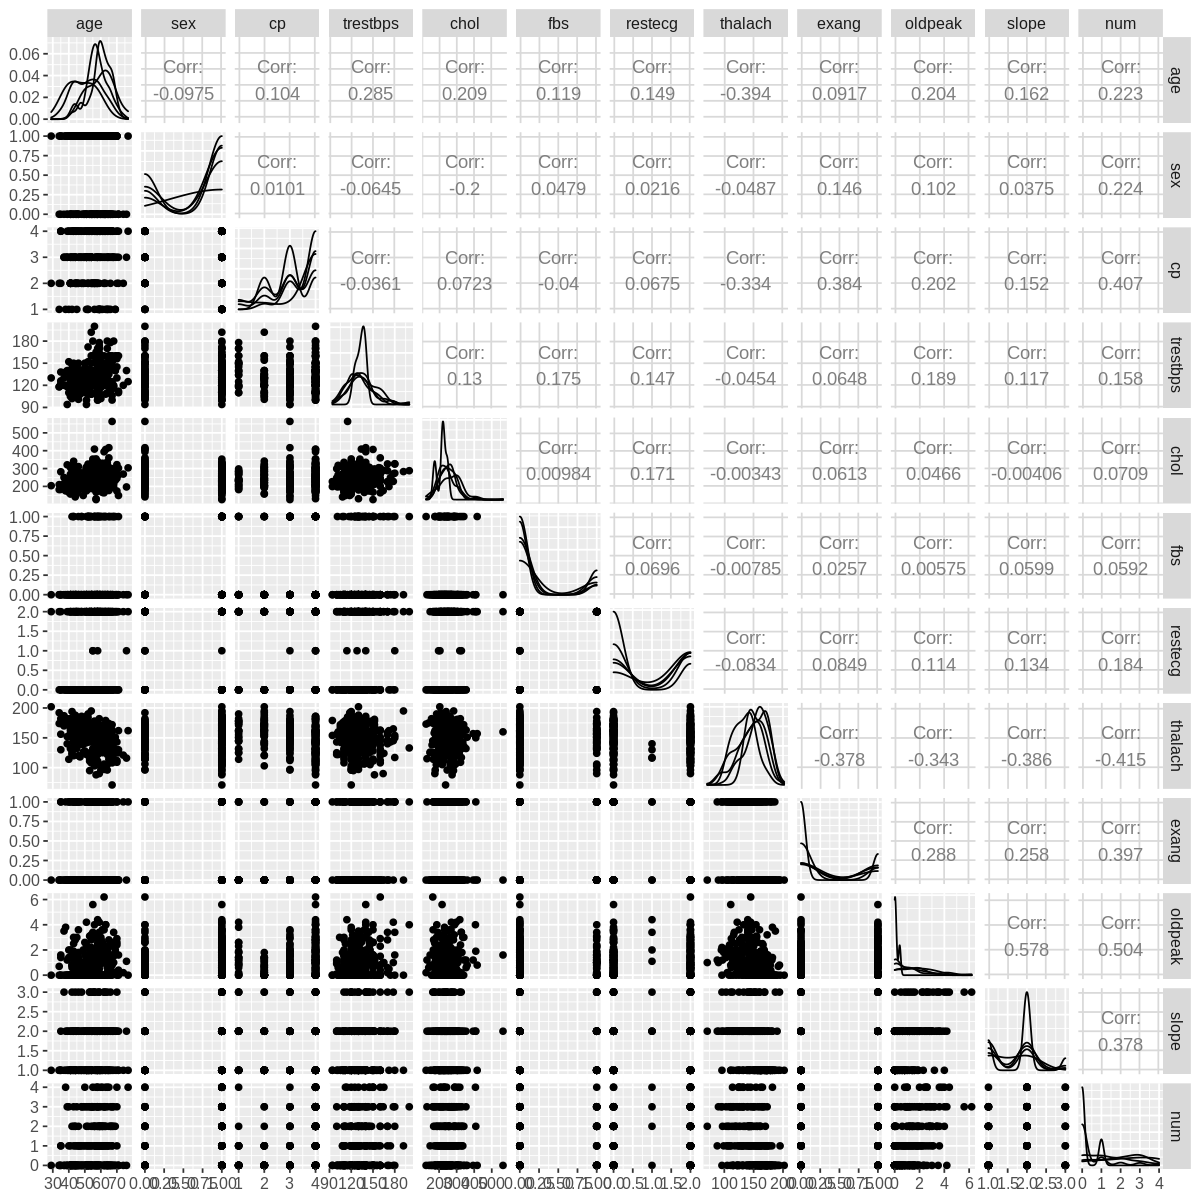

In [4]:
options(repr.plot.width = 10, repr.plot.height = 10)
correlation_plot <- heart_disease_data %>% 
                select(-ca, -thal) %>% 
                ggpairs(heart_disease_data[1:12]) +
                theme(text = element_text(size = 12))
correlation_plot

*Figure 1: Correlation plot*

### A Visualization of the Dataset
Based on the ggparis correlation plot, we found that the correlation between cp and presence of heart disease (the target variable) is relatively high; therefore, we chose to plot a graph to show the relationship between these two variables.

`summarise()` regrouping output by 'num' (override with `.groups` argument)



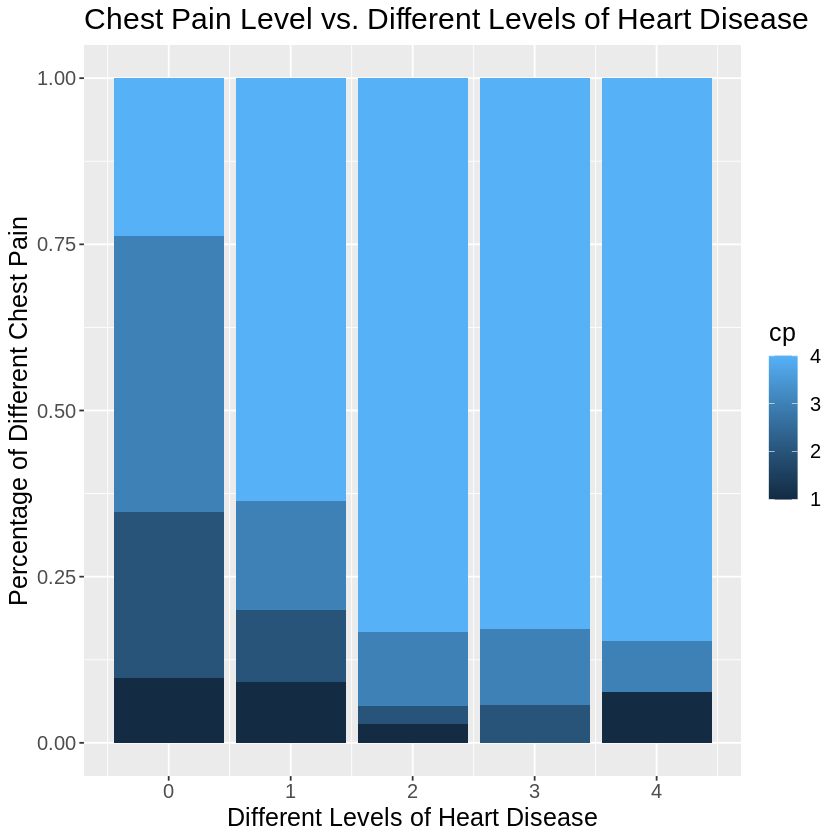

In [5]:
options(repr.plot.width = 7, repr.plot.height = 7)

cp_vs_num <- heart_disease_data %>% 
            select(num, cp) %>% 
            group_by(num, cp) %>% 
            summarize(n = n()) %>%
            ggplot(aes(x = num, y = n, fill = cp)) +
            labs(x="Different Levels of Heart Disease", y= "Percentage of Different Chest Pain")+
            geom_bar(stat = "identity",position = "fill") +
            ggtitle("Chest Pain Level vs. Different Levels of Heart Disease")+
            theme(text = element_text(size = 15))
cp_vs_num

*Figure 2: Bar graph showing the proportion of different chest pain level in each levels of heart disease*

We try to visualize which type of chest pain occurs most often in different levels of heart disease(0 meaning zero probability of having heart diseanse, and 4 meaning the most probability of having a heart disease).<br>

We observed that individuals having type 4 chest pain which is asymptomatic chest pain, have the most probobility(4) of having heart disease.

### Check for balancing

We summarized the counts for the target variable, num, and calcuated the percentages of different num values. And we found that the percentage of num = 0 (having no presence of heart disease) dominates the dataset and the for the num = 1,2,3,4 have way smaller percentages than num=0. Therefore, it implies that the dataset is imbalanced. 

In [6]:
num_obs <- nrow(heart_disease_data)
        heart_disease_data %>% 
        group_by(num) %>% 
        summarize(
        count = n(),
        percentage = n() / num_obs * 100)

`summarise()` ungrouping output (override with `.groups` argument)



num,count,percentage
<dbl>,<int>,<dbl>
0,164,54.125413
1,55,18.151815
2,36,11.881188
3,35,11.551155
4,13,4.290429


### Mutating num to binary categorical 
We therefore resolve this issue by grouping all the non-zero probability levels of having heart disease into one group. Thus, we will now have num of two classes (0 and 1). 0 represents having no presence of heart disease. 1 represents having presence of heart disease. 

In [7]:
heart_disease_data_5 <- read_csv(heart_disease_url, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs",
                                                               "restecg", "thalach", "exang", "oldpeak", "slope",
                                                               "ca", "thal", "num")) %>% 
                    mutate(num = replace(num, num =='2',1)) %>% 
                    mutate(num = replace(num, num =='3',1)) %>% 
                    mutate(num = replace(num, num =='4',1)) %>% 
                    select(cp, thalach, exang, slope, oldpeak, num) %>% 
                    mutate(num = as.factor(num))
                    
heart_disease_data_5                

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)



cp,thalach,exang,slope,oldpeak,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,150,0,3,2.3,0
4,108,1,2,1.5,1
4,129,1,2,2.6,1
⋮,⋮,⋮,⋮,⋮,⋮
4,115,1,2,1.2,1
2,174,0,2,0.0,1
3,173,0,1,0.0,0


### Check for balancing after grouping 

In [8]:
num_obs_5 <- nrow(heart_disease_data_5)
        heart_disease_data_5 %>% 
        group_by(num) %>% 
        summarize(
        count = n(),
        percentage = n() / num_obs_5 * 100)

`summarise()` ungrouping output (override with `.groups` argument)



num,count,percentage
<fct>,<int>,<dbl>
0,164,54.12541
1,139,45.87459


After grouping, we now have a roughly balanced dataset.

### Split Into Training and Testing Dataset
Given that we do not have many number of instances in this dataset, we decided that setting 75% of the data in the dataset as training data and the remaining 25% as testing data will make a good balance for training the classifier and evaluating the classifier's accuracy, and it is a standardized way of data splitting. 

In [9]:
set.seed(1234)
heart_disease_split_mut <- initial_split(heart_disease_data_5, prop = 0.75, strata = num)
heart_disease_train_mut <- training(heart_disease_split_mut)
heart_disease_test_mut <- testing(heart_disease_split_mut)

head(heart_disease_data_5, 10)

cp,thalach,exang,slope,oldpeak,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,150,0,3,2.3,0
4,108,1,2,1.5,1
4,129,1,2,2.6,1
⋮,⋮,⋮,⋮,⋮,⋮
4,163,1,1,0.6,0
4,147,0,2,1.4,1
4,155,1,3,3.1,1


### Create model

We are using classification model because num, the target variable, is a categorical variable representing different probabilities of presence of heart disease. 

In [10]:
knn_spec_mut <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn")%>%
            set_mode("classification") 
knn_spec_mut

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


#### Standardize the data

We added the step_scale and step_center steps for all predictors when creating the recipe. Therefore, all predictors will each have a mean of 0 and standard deviation of 1. This ensures all data observations will be on a comparable scale and contribute equal shares to the calculation of the distance between points.

In [11]:
heart_recipe_mut <- recipe(num ~ ., data = heart_disease_train_mut)%>%
        step_scale(all_predictors())%>%
        step_center(all_predictors()) 

#### Cross-Validation
Since we have splitted 75% of the dataset to be the train data, and 25% of the dataset to be the test data. 5 folds in cross validation will provide sufficient sample data size for us to train the classifier.

In [12]:
heart_disease_vfold_mut <- vfold_cv(heart_disease_train_mut, v = 5, strata = num)


We run our cross-validation for using numbers of neighbors ranging from 1 to 50, and step = 1. We did not choose any K beyond 50 because as K increases, the runtime increases significantly. After this, we put the recipe and model specification together in a workflow and tunes the model and returns the accuracy for each number of neighbors.

In [13]:
k_lots_mut <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

knn_fit_mut <- workflow() %>% 
            add_recipe(heart_recipe_mut) %>% 
            add_model(knn_spec_mut) %>% 
            tune_grid(resamples = heart_disease_vfold_mut, grid = k_lots_mut) 

In [14]:
heart_disease_metrics_mut <- knn_fit_mut %>% 
                        collect_metrics()

accuracies_mut <- heart_disease_metrics_mut %>% 
        filter(.metric == "accuracy") 
accuracies_mut

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7285024,5,0.02711991,Model01
2,accuracy,binary,0.7285024,5,0.02711991,Model02
3,accuracy,binary,0.7022222,5,0.02322089,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,accuracy,binary,0.7850242,5,0.004950218,Model48
49,accuracy,binary,0.7850242,5,0.008471342,Model49
50,accuracy,binary,0.7850242,5,0.008471342,Model50


#### Drawing the accuracy graph
We can decide which number of neighbors is best by plotting the accuracy versus K, as shown in Figure 3.

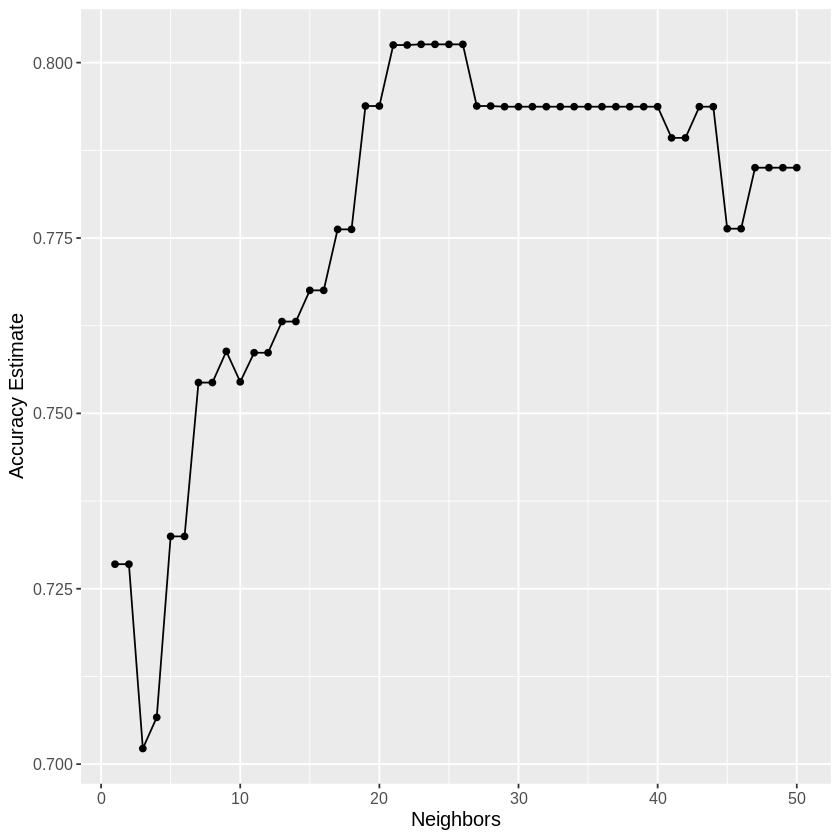

In [15]:
accuracy_vs_k_mut <- ggplot(accuracies_mut, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k_mut

*Figure 3: Plot of estimated accuracy versus the number of neighbors.*

From the graph, we can see that the highest accuracy was 80.2% for a k value of 26. 

In [16]:
accuracies_final_mut <- heart_disease_metrics_mut %>% 
        filter(.metric == "accuracy") %>% 
        arrange(mean) %>% 
        tail(1)
accuracies_final_mut
k_final_mut <- accuracies_final_mut %>% select(neighbors) %>% pull()

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
26,accuracy,binary,0.8026087,5,0.01386701,Model26


Then we pass k = 26 to the  knn_spec and recipe done earlier were integrated together into a new workflow to be applied to the test data.

In [17]:
knn_spec_mut_new <- nearest_neighbor(weight_func = "rectangular", neighbors = k_final_mut) %>% 
  set_engine("kknn") %>% 
  set_mode("classification")
knn_spec_mut_new

knn_fit_mut_new <- workflow() %>% 
  add_recipe(heart_recipe_mut) %>% 
  add_model(knn_spec_mut_new) %>% 
  fit(data = heart_disease_train_mut)
knn_fit_mut_new

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = k_final_mut
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~k_final_mut,     kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2324561
Best kernel: rectangular
Best k: 26

We used the k-nn classifier object we created to predicts num for our test class. We used bind_cols function to add column of predictions to the original test data. The num variable contains the true presence of heart disease, and the .pred_class contains the predicted presence of heart disease.

In [18]:
heart_prediction_mut <- predict(knn_fit_mut_new, heart_disease_test_mut) %>% 
                    bind_cols(heart_disease_test_mut)

heart_prediction_mut

.pred_class,cp,thalach,exang,slope,oldpeak,num
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,3,187,0,3,3.5,0
0,2,178,0,1,0.8,0
1,4,160,0,3,3.6,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,4,90,0,2,1.0,1
1,4,123,1,2,0.2,1
1,4,141,0,2,3.4,1


We accessed the accurary of our classifier using the metrics function to get statistics about the quality of the model. We specified the num (actual) and .pred_class (predicted) arguments. And in this dataframe, we filtered the .metric colume in order to get the accuracy row, and value of .estimate shows that the accuracy is 81.3%.

In [19]:
heart_metrics_mut <- heart_prediction_mut %>% 
                metrics(truth = num, estimate = .pred_class) %>% 
                filter(.metric == "accuracy")
heart_metrics_mut

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8133333


We use the conf_mat function to output a confusion matrix for the classifier. And it shows a table of numbers of cases that are one of the following: true positive, false positive, true negative, false negative.

In [20]:
mnist_conf_mat_mut <- heart_prediction_mut %>% 
                 conf_mat(truth = num, estimate = .pred_class) 
mnist_conf_mat_mut

          Truth
Prediction  0  1
         0 35  8
         1  6 26

## Final Visualization

### Confusion matrix

Below shows a confusion matrix, and 1 means presence of heart disease and 0 means no presence of heart disease. 

The confusion matrix shows 35 cases correctly predicted as patient not having heart disease, and 26 cases correctly predicted as patients having heart disease. It also showed that the classifier makes some mistakes. In particular, it classified 6 cases as patient having heart disease which actually they don't have heart disease; in addition, it classified 8 cases with patients as not having heart disease but actually they have heart disease.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



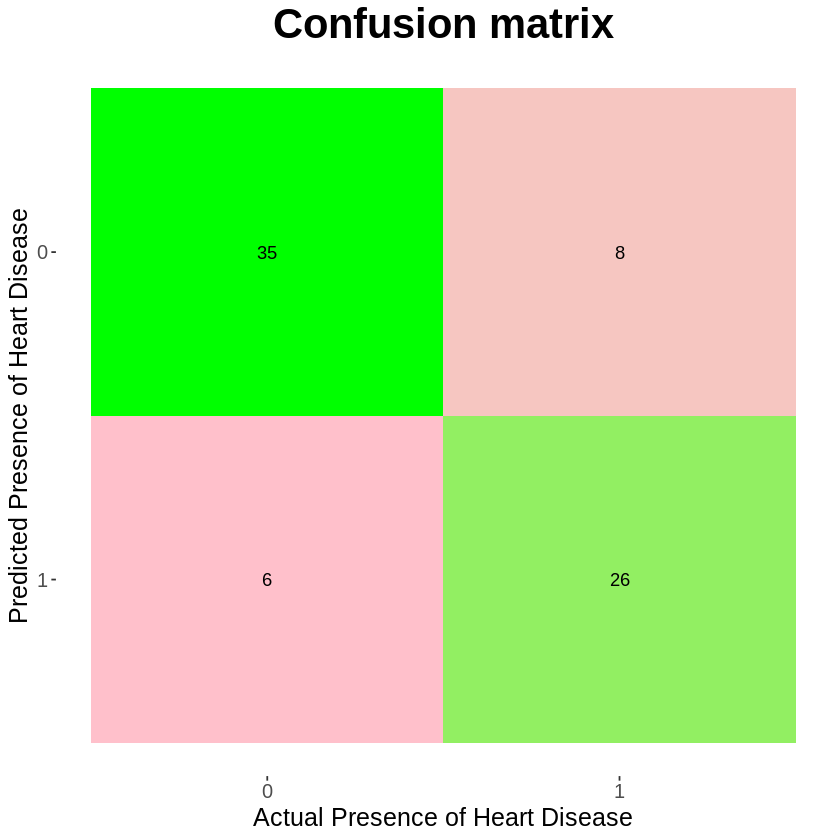

In [21]:
options(repr.plot.width = 7, repr.plot.height = 7)
autoplot(mnist_conf_mat_mut, type = "heatmap") +
scale_fill_gradient(low = "pink", high = "green") +
theme(text = element_text(size = 15)) +
ggtitle("Confusion matrix") +
theme(plot.title = element_text(hjust = 0.5)) +
theme(plot.title = element_text(size = 25, face = "bold")) +
labs(x = "Actual Presence of Heart Disease", y = "Predicted Presence of Heart Disease")

*Figure 4: Confusion matrix*

### Scatterplot of two predictors(oldpeak vs. thalatch)
Thalach is the maximum heart rate achieved. Oldpeak means ST depression induced by exercise relative to rest, which is the most reliable indicator of exercise-induced ischaemia (ischaemia means that blood flow to the heart is reduced). Among the correlations between five predictors we have chosen, oldpeak and thalach have relatively high correlation between one and other. Therefore, we choose to plot this graph and use these predictors to illustrate the prediction of presence of heart disease. 

This graph shows that with higher thalach level(approx. greater than 152) and lower oldpeak level(approx. less than 2), the patient is less likely to have a presence of heart disease. Whereas patients with relatively lower level of thalach and higher oldpeak level, there is a higher probability of having presence of heart disease.

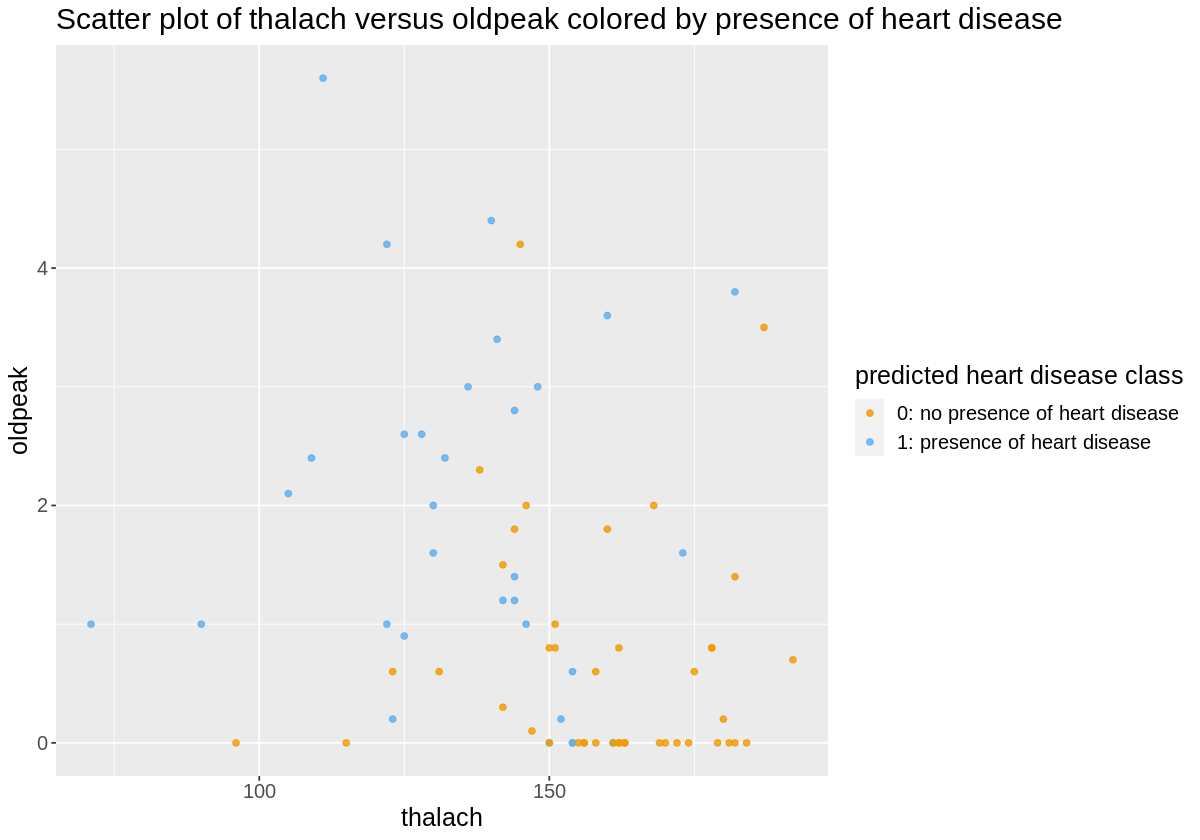

In [22]:
options(repr.plot.width = 10, repr.plot.height = 7)


two_predictors_ <- heart_prediction_mut %>%
  ggplot(aes(x = thalach, y = oldpeak, color = .pred_class)) +
  geom_point(alpha = 0.8) +
  labs(color = "predicted heart disease class") +
  scale_color_manual(labels = c("0: no presence of heart disease", "1: presence of heart disease"), 
                     values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 15))+
  ggtitle("Scatter plot of thalach versus oldpeak colored by presence of heart disease")

two_predictors_

*Figure 5: Scatter plot of thalach versus oldpeak colored by presence of heart disease.*

***

## Predictions without Balancing (Initial attempt)
   In the initial work, we did not check that the proportion of data being predicted was balanced, resulting in a low accuracy of this prediction method.
   In this prediction method, all codes are used in the same way as the 5 predictors above. We won't explain every single line of code in detail.

In [23]:
heart_disease_data_not_balanced <- read_csv(heart_disease_url, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs",
                                                               "restecg", "thalach", "exang", "oldpeak", "slope",
                                                               "ca", "thal", "num")) %>% 
                    select(sex, age, cp, thalach, exang, slope, oldpeak, num) %>% 
                    mutate(num = as.factor(num))

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)



In [24]:
set.seed(1234)
heart_disease_split_not_balanced <- initial_split(heart_disease_data_not_balanced, prop = 0.75, strata = num)
heart_disease_train_not_balanced <- training(heart_disease_split_not_balanced)
heart_disease_test_not_balanced <- testing(heart_disease_split_not_balanced)

In [25]:
knn_spec_not_balanced <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn")%>%
            set_mode("classification") 
knn_spec_not_balanced

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [26]:
heart_recipe_not_balanced <- recipe(num ~ ., data = heart_disease_train_not_balanced)%>%
        step_scale(all_predictors())%>%
        step_center(all_predictors()) 

heart_disease_vfold_not_balanced <- vfold_cv(heart_disease_train_not_balanced, v = 5, strata = num)

In [27]:
# FITTING Model

k_lots <- tibble(neighbors = seq(from = 1, to = 50, by = 1))
knn_fit_not_balanced <- workflow() %>% 
            add_recipe(heart_recipe_not_balanced) %>% 
            add_model(knn_spec_not_balanced) %>% 
            tune_grid(resamples = heart_disease_vfold_not_balanced, grid = k_lots)

! Fold1: internal: No observations were detected in `truth` for level(s): '4'
Com...



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.4797845,5,0.02594622,Model01
2,accuracy,multiclass,0.4797845,5,0.02594622,Model02
3,accuracy,multiclass,0.5236967,5,0.03124084,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,accuracy,multiclass,0.5602859,5,0.02024686,Model48
49,accuracy,multiclass,0.5602859,5,0.02024686,Model49
50,accuracy,multiclass,0.5602859,5,0.02024686,Model50


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
12,accuracy,multiclass,0.5981879,5,0.017688,Model12


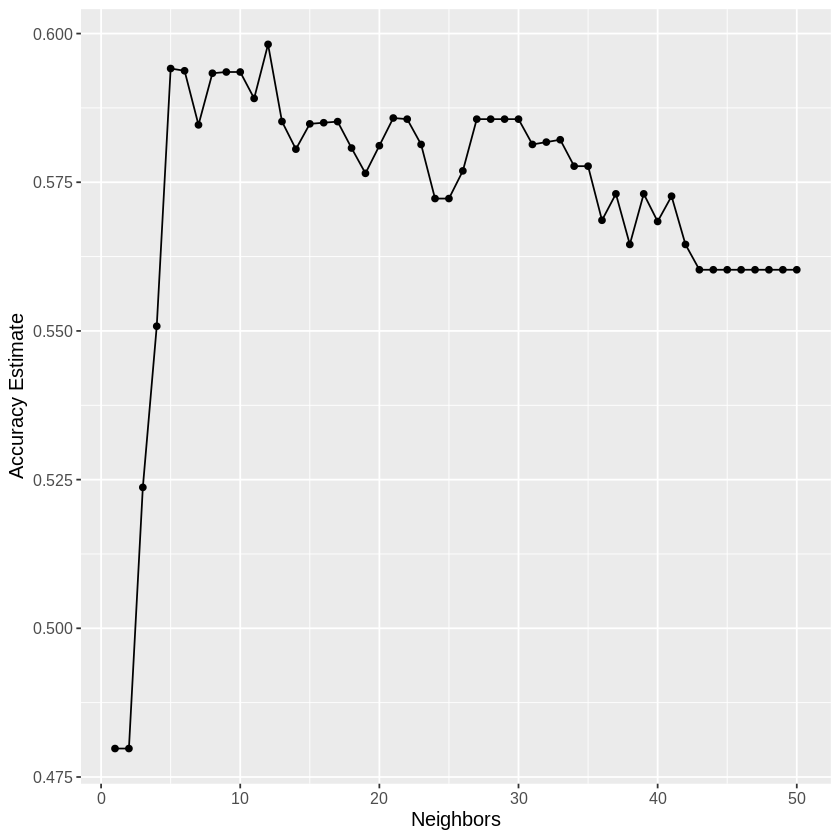

In [28]:
# set metrics

heart_disease_metrics_not_balanced <- knn_fit_not_balanced %>% collect_metrics()

accuracies_not_balanced <- heart_disease_metrics_not_balanced %>% 
        filter(.metric == "accuracy") 
accuracies_not_balanced
    

options(repr.plot.width = 7, repr.plot.height = 7)

accuracy_vs_k_not_balanced <- ggplot(accuracies_not_balanced, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k_not_balanced

accuracies_final_not_balanced <- heart_disease_metrics_not_balanced %>% 
        filter(.metric == "accuracy") %>% 
        arrange(mean) %>% 
        tail(1)
accuracies_final_not_balanced
k_final_not_balanced <- accuracies_final_not_balanced %>% select(neighbors) %>% pull()

*Figure 6: Plot of estimated accuracy versus the number of neighbors for the imbalanced case.*

In [29]:
# knn_tune

knn_spec_not_balanced_updated <- nearest_neighbor(weight_func = "rectangular", neighbors = k_final_not_balanced) %>% 
  set_engine("kknn") %>% 
  set_mode("classification")

knn_fit_not_balanced_updated <- workflow() %>% 
  add_recipe(heart_recipe_not_balanced) %>% 
  add_model(knn_spec_not_balanced_updated) %>% 
  fit(data = heart_disease_train_not_balanced)

In [30]:
# make predictions

heart_prediction_not_balanced <- predict(knn_fit_not_balanced_updated, heart_disease_test_not_balanced) %>% 
                    bind_cols(heart_disease_test_not_balanced)

heart_metrics_not_balanced_updated <- heart_prediction_not_balanced %>% 
                metrics(truth = num, estimate = .pred_class) %>% 
                filter(.metric == "accuracy")

mnist_conf_mat_not_balanced <- heart_prediction_not_balanced %>% 
                 conf_mat(truth = num, estimate = .pred_class)
heart_metrics_not_balanced_updated
mnist_conf_mat_not_balanced

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5675676


          Truth
Prediction  0  1  2  3  4
         0 39  9  3  4  1
         1  1  0  3  3  0
         2  1  1  2  0  3
         3  0  2  1  1  0
         4  0  0  0  0  0

`In this not balanced case, we observed that the accuracy is really low, so we resampled the dataset above and discard this method.`

`The low accuracy in this case is led by the imbalanced distribution of the target variable sicne the accuracy can be greatly influenced by the target class which is over-represented.` 

***

## 4 Predictors Case(Second Attempt)
`Although the prediction method we chose at the end contains five predictors, we wanted to see if reducing the number of predictors will improve the accuracy. The reason we thought this might be the case is that even though the five predictors we chose are already the ones with the most correlation with the target variable, but the correlation values are almost all below 0.5, meaning medium level of correlation. We therefore remove the predictor with the least correlation value which is “slope” in this case, and try to compare the accuracy with what we got using 5 predictors.`

In [31]:
heart_disease_data_4 <- read_csv(heart_disease_url, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs",
                                                               "restecg", "thalach", "exang", "oldpeak", "slope",
                                                               "ca", "thal", "num")) %>% 
                    mutate(num = replace(num, num =='2',1)) %>% 
                    mutate(num = replace(num, num =='3',1)) %>% 
                    mutate(num = replace(num, num =='4',1)) %>% 
                    mutate(num = as.factor(num)) %>% 
                    select(cp, thalach, exang, oldpeak, num) 
heart_disease_data_4

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)



cp,thalach,exang,oldpeak,num
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,150,0,2.3,0
4,108,1,1.5,1
4,129,1,2.6,1
⋮,⋮,⋮,⋮,⋮
4,115,1,1.2,1
2,174,0,0.0,1
3,173,0,0.0,0


In [32]:
set.seed(1234)
heart_disease_split_mut_4 <- initial_split(heart_disease_data_4, prop = 0.75, strata = num)
heart_disease_train_mut_4 <- training(heart_disease_split_mut_4)
heart_disease_test_mut_4 <- testing(heart_disease_split_mut_4)

In [33]:
knn_spec_mut_4 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn")%>%
            set_mode("classification") 

In [34]:
heart_recipe_mut_4 <- recipe(num ~ ., data = heart_disease_train_mut_4)%>%
        step_scale(all_predictors())%>%
        step_center(all_predictors()) 

heart_disease_vfold_mut_4 <- vfold_cv(heart_disease_train_mut_4, v = 5, strata = num)

In [35]:
k_lots_mut_4 <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

knn_fit_mut_4 <- workflow() %>% 
            add_recipe(heart_recipe_mut_4) %>% 
            add_model(knn_spec_mut_4) %>% 
            tune_grid(resamples = heart_disease_vfold_mut_4, grid = k_lots_mut_4)

In [36]:
heart_disease_metrics_mut_4 <- knn_fit_mut_4 %>% collect_metrics()

accuracies_mut_4 <- heart_disease_metrics_mut_4 %>% filter(.metric == "accuracy") 
    
accuracy_vs_k_mut_4 <- ggplot(accuracies_mut_4, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracies_final_mut_4 <- heart_disease_metrics_mut_4 %>% 
        filter(.metric == "accuracy") %>% 
        arrange(mean) %>% 
        tail(1)
accuracies_final_mut_4

final_k_for_4predictors <- accuracies_final_mut_4 %>% select(neighbors)%>%pull()


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
48,accuracy,binary,0.7849275,5,0.009147417,Model48


In [37]:
knn_spec_mut_4 <- nearest_neighbor(weight_func = "rectangular", neighbors = final_k_for_4predictors) %>% 
  set_engine("kknn") %>% 
  set_mode("classification")
knn_fit_mut_4 <- workflow() %>% 
  add_recipe(heart_recipe_mut_4) %>% 
  add_model(knn_spec_mut_4) %>% 
  fit(data = heart_disease_train_mut_4)

In [38]:
heart_prediction_mut_4 <- predict(knn_fit_mut_4, heart_disease_test_mut_4) %>% 
                    bind_cols(heart_disease_test_mut_4)

heart_metrics_mut_4 <- heart_prediction_mut_4 %>% 
                metrics(truth = num, estimate = .pred_class) %>% 
                filter(.metric == "accuracy")

mnist_conf_mat_mut_4 <- heart_prediction_mut_4 %>% 
                 conf_mat(truth = num, estimate = .pred_class)

heart_prediction_mut_4
heart_metrics_mut_4
mnist_conf_mat_mut_4

.pred_class,cp,thalach,exang,oldpeak,num
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,3,187,0,3.5,0
0,2,178,0,0.8,0
1,4,160,0,3.6,1
⋮,⋮,⋮,⋮,⋮,⋮
1,4,90,0,1.0,1
1,4,123,1,0.2,1
1,4,141,0,3.4,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8133333


          Truth
Prediction  0  1
         0 36  9
         1  5 25

`We found out that the prediction accuracy using 4 predictors is the same as using 5 predictors! This is against our hypothesis which is using less predictors here will produce a higher accuracy. There is no difference in accuracy in this case might due to the fact that we do no have many instances in this data set.`<br>
`However, we noticed that the false negative case here using 4 predictors is one more than using 5 predicors, since it is important to not misdiagnose patients with heart disease. Thus, we stick to the classifier with 5 predictors. `

***

## Discussion


### Findings Summary
We loaded the data and created a correlation plot between all predictors and the target variable and found out that the five most correlated predictors are chest pain type, maximum heart rate achieved, exercise induced angina, the slope of the peak exercise ST segment value, and ST depression induced by exercise relative to rest.<br>

Our overall goal is to help a doctor predict an individual’s probability of having heart disease given an individual’s physical conditions, we therefore picked these five predictors to train our classifier using KNN algorithm. We successfully trained our classifier having an accuracy of around 81.3% on the testing dataset. <br>

We tried to further improve the accuracy of our classifier by reducing the number of predictors from 5 to 4, but the accuracy stayed the same and its false negative cases went up. We therefore finalized our classifier by training with five predictors.<br>

In our final visualization, we plotted a scatterplot showing the relationship between ST depression induced by exercise relative to rest(oldpeak) versus the maximum heart rate achieved(thalach) colored by presence of heart disease. We observed that patient with higher thalach level (greater than 150) and lower oldpeak level(less than 2) will most likely not have a presence of heart disease. <br>


## Impacts 

1. For people having their cp, thalach, exang, slope, oldpeak health measurements, they can check against their heart health condition using this classifier. Based on variety of different health measurements listed above, a classifier is helpful for doctors to make immediate and primary predictions on the presence of heart disease of patients. If the classifier predicted that there is presence of heart disease of a patient, it notifies doctors to provide treatments timely. 



2. Based on the final visulization of oldpeak vs thalach, we observed that patient with higher thalach level (maximum heart rate achieved) and lower oldpeak level (depression induced by exercise relative to rest) will be more likely not to have a presence of heart disease. This raises our awareness of the importance of exercies and cardiac health, since appropriate amount of exercies has favorable effects on preventing cardiovascular diseases. Therefore, this can remind people to exercise regularly.

## Expectations
In real life if a patient have missing health measurements (i.e. missing predictor values) needed by the classifier, the model will not provide a result.<br>

The final results of the classifier met our expectations, we chose the 5 predictors and got a relatively good accuracy of 81.3%. Besides the 5 correlated factors (our predictors) we used in the model, many other factors such as age, gender, frailty, obesity, and diabetes, will also related to having higher risks of heart disease. Not including variables outside of our selected dataset does not suggest that they are not important. Moreover, our model outputs results uniformally only by using datasets without missing datas. 

## Future questions
1. Future analysis could also focus on reducing the number of false negatives, since it is very important to avoid misdiagnosing heart disease cases in order to avoid failing to diagnose patients who actually need medical care.

2. Our model did not include all predictors, and we only picked the predictors based on the ggpair correlation plot. We could use the forward selection method to improve our predictor. This method starts with no predictors in the model, adds the most important predictors incrementally, and stops when the improvement stops being statistically significant.

## Citation
Perret-Guillaume, C., Joly, L., & Benetos, A. (2009). Heart rate as a risk factor for cardiovascular disease. Progress in cardiovascular diseases, 52(1), 6–10. https://doi.org/10.1016/j.pcad.2009.05.003

Diderholm, E., Andrén, B., Frostfeldt, G., Genberg, M., Jernberg, T., Lagerqvist, B., Lindahl, B., & Wallentin and the Fast Revascularization during InStability in Coronary artery disease (FRISC II) Investigators, L. (2002). ST depression in ECG at entry indicates severe coronary lesions and large benefits of an early invasive treatment strategy in unstable coronary artery disease. the FRISC II ECG substudy. European Heart Journal, 23(1), 41-49. https://doi.org/10.1053/euhj.2001.2694

Finkelhor, R. S., Newhouse, K. E., Vrobel, T. R., Miron, S. D., & Bahler, R. C. (1986). The ST segment/heart rate slope as a predictor of coronary artery disease: Comparison with quantitative thallium imaging and conventional ST segment criteria. The American Heart Journal, 112(2), 296-304. https://doi.org/10.1016/0002-8703(86)90265-6